 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

**Student name**: Lorenzo Valentini<br>
**ID Number**: 1187687


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
%matplotlib nbagg
import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [3]:
IDnumber = 1187687 
np.random.seed(IDnumber)



Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [4]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

# skip first line
header = next(music) 
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

#columns 0,1,2 contain the features
X_loaded_perc = dataset[:,:-1].astype(float)
# last column contains the labels
Y_loaded_perc = dataset[:,-1].astype(int)    

# for the perceptron classical--> -1, metal-->1
Y_loaded_perc = 2*Y_loaded_perc-1            
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)

#random permutation
permutation = np.random.permutation(m)

X_perc = X_loaded_perc[permutation]
Y_perc = Y_loaded_perc[permutation]


Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [6]:
# X_training = instances for training set
X_training_perc = X_perc[0:150,:]
# Y_training = labels for the training set
Y_training_perc = Y_perc[0:150]

# X_test = instances for test set
X_test_perc =  X_perc[0:-150,:]
# Y_test = labels for the test set
Y_test_perc =  Y_perc[0:-150]

# m_test needs to be the number of samples in the test set
#m_training_perc = len()np.concatenate((X_training_perc,Y_training_perc.reshape(150,1)),axis=1)
# m_test needs to be the number of samples in the test set
#m_test_perc = np.concatenate((X_test_perc,Y_test_perc.reshape(50,1)),axis=1)

print(Y_training_perc) # to make sure that Y_training contains both 1 and -1
#print("First lines of the test set\n",m_test_perc[:5,:])

print("\nNumber of classical instances in test:", np.sum(Y_test_perc==-1))
print("Number of metal instances in test:", np.sum(Y_test_perc==1))

print("Shape of training set: " + str(X_training_perc.shape))
print("Shape of test set: " + str(X_test_perc.shape))

[-1 -1  1  1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1
  1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1
  1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1  1
  1  1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1
  1  1  1  1 -1  1]

Number of classical instances in test: 25
Number of metal instances in test: 25
Shape of training set: (150, 3)
Shape of test set: (50, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [7]:
# Add a 1 to each sample (homogeneous coordinates)
onestr=np.ones(150)
onestr=onestr.reshape(150,1)

onests=np.ones(50)
onests=onests.reshape(50,1)

X_training_omo = np.concatenate((onestr,X_training_perc),axis=1)
X_test_omo = np.concatenate((onests,X_test_perc),axis=1)

print("Training set in homogeneous coordinates:")
print(X_training_omo[:10])

Training set in homogeneous coordinates:
[[1.00000000e+00 2.34907670e+02 2.70478239e-01 1.21629376e+03]
 [1.00000000e+00 1.98768029e+02 2.61728171e-01 1.32731443e+03]
 [1.00000000e+00 1.61499023e+02 4.54049441e-01 1.74109732e+03]
 [1.00000000e+00 1.03359375e+02 4.40987757e-01 2.64694734e+03]
 [1.00000000e+00 2.15332031e+02 2.76529211e-01 1.35891836e+03]
 [1.00000000e+00 1.23046875e+02 4.72493846e-01 2.71001460e+03]
 [1.00000000e+00 1.12347147e+02 4.32488018e-01 2.19853455e+03]
 [1.00000000e+00 1.35999178e+02 3.69871950e-01 2.21842602e+03]
 [1.00000000e+00 9.57031250e+01 4.38488566e-01 2.68341629e+03]
 [1.00000000e+00 9.57031250e+01 4.70335178e-01 2.69063999e+03]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [8]:
def perceptron_update(current_w, x, y):
    
    parameter=y*np.inner(current_w,x)
    
    if parameter<=0:
        
        new_w=current_w+x*y
        
    else:
        
        new_w=current_w
        
    return new_w


def perceptron(X_set, Y_set, max_num_iterations):
    
    curr_w = np.zeros(4)
    best_w = np.zeros(4)
    num_samples = len(Y_set)
    best_error = 151
    index_misclassified = 0 #will be ovewritten
    num_misclassified = 0 #will be ovewritten
    training_omo = np.concatenate((X_set,Y_set.reshape(num_samples,1)),axis=1)
    num_iter = 0
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        index_misclassified = -1
        num_misclassified = 0
        
        training_omo=np.random.permutation(training_omo)#to avoid working always on the same sample: permutation
        
        for i in range(num_samples):
            
            x=training_omo[i,0:4]
            y=training_omo[i,4]
            parameter=y*np.inner(curr_w,x)
            
            if parameter<=0:
                
                num_misclassified+=1
                index_misclassified=i
                
        if num_misclassified<best_error:
            
            best_error=num_misclassified
            best_w=curr_w

        if index_misclassified!=-1: #call update function using a misclassifed sample
            
            curr_w=perceptron_update(curr_w, training_omo[index_misclassified,0:4], Y_set[index_misclassified])

        num_iter += 1
        
    return best_w, best_error


Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [11]:
w_found, error = perceptron(X_training_omo,Y_training_perc, 100)
print("Training Error of perpceptron (100 iterations): "+str(100*error/len(Y_training_perc))+"%")
print("w:",w_found)

Training Error of perpceptron (100 iterations): 30.666666666666668%
w: [-8.00000000e+00 -1.18380762e+03 -1.15146606e+00  5.43808366e+01]


The output with only 100 iteration is nearly casual, it has given results everywhere between 10% and 49%.

**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [12]:
def wchecker(w,X,Y):
    
    num_misclassified = 0
    
    for i in range(len(Y)):     
        
        x=X[i,0:4]
        y=Y[i]
        parameter=y*np.inner(w,x)
                             
        if parameter<=0:
                             
            num_misclassified+=1
                             
    return num_misclassified

                             
num_errors=wchecker(w_found,X_test_omo,Y_test_perc)

true_loss_estimate = num_errors/len(Y_test_perc)
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perpceptron (100 iterations): 0.3


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**

With 100 iterations I get results in a pretty random way, sometimes, due to the low number of samples, the test error is even less than the training error. Anyway both of them oscillate in a too large range of values: 10%-50%.


**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [13]:
w_found, error = perceptron(X_training_omo,Y_training_perc, 4000)
print("Training Error of perpceptron (4000 iterations): " +str(100*error/len(Y_training_perc))+"%")
print("w:",w_found)


num_errors=wchecker(w_found,X_test_omo,Y_test_perc)

true_loss_estimate = num_errors/len(Y_test_perc)
print("Test Error of perpceptron (4000 iterations): " + str(100*true_loss_estimate)+"%")

Training Error of perpceptron (4000 iterations): 9.333333333333334%
w: [-9.30000000e+01 -1.16161056e+04 -1.46777306e+00  7.24464527e+02]
Test Error of perpceptron (4000 iterations): 8.0%


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**

For such a large number of iterations, the error drops down to less than 10%, and stabilizes around that value for even greater numbers of iterations. Here as well, the test error sometimes is less than the training error, sice the number of samples isn't high.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [2]:
# Load the dataset
filename = 'data/music.csv'
music_logist = csv.reader(open(filename, newline='\n'), delimiter=',')

# skip first line
header = next(music_logist) 
print(f"Header: {header}\n")

dataset = np.array(list(music_logist))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X_loaded = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y_loaded = dataset[:,-1].astype(int)    # last column contains the labels


Y_loaded = 2*Y_loaded-1                 # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X_logist = X_loaded[permutation]
Y_logist = Y_loaded[permutation]

print("First lines of X_logist:\n",X_logist[:5,:])


Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200
First lines of X_logist:
 [[1.17453835e+02 4.57425500e-01 2.34061612e+03]
 [1.43554688e+02 5.27229806e-01 2.57604181e+03]
 [1.17453835e+02 2.79420640e-01 1.28492177e+03]
 [1.29199219e+02 4.84545951e-01 2.87123564e+03]


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [4]:
X_training_logist = X_logist[0:150,:]
Y_training_logist = Y_logist[0:150]

X_test_logist =  X_logist[-50:,:]
Y_test_logist =  Y_logist[-50:]

#training_logist = np.concatenate((X_training_logist,Y_training_logist.reshape(150,1)),axis=1)
#test_logist = np.concatenate((X_test_logist,Y_test_logist.reshape(50,1)),axis=1)

print("Number of samples in the test set:", len(Y_test_logist))
print("Number of samples in the training set:", len(Y_training_logist))

print("\nNumber of classical instances in test:", np.sum(Y_test_logist==-1))
print("Number of metal instances in test:", np.sum(Y_test_logist==1))
print("\nNumber of classical instances in training:", np.sum(Y_training_logist==-1))
print("Number of metal instances in training:", np.sum(Y_training_logist==1))

print("\nShape of training set: " + str(X_training_logist.shape))
print("Shape of test set: " + str(X_test_logist.shape))

print("First lines of X_logist\n",X_logist[:5,:])


Number of samples in the test set: 50
Number of samples in the training set: 150

Number of classical instances in test: 28
Number of metal instances in test: 22

Number of classical instances in training: 72
Number of metal instances in training: 78

Shape of training set: (150, 3)
Shape of test set: (50, 3)
First lines of X_logist
 [[1.17453835e+02 4.57425500e-01 2.34061612e+03]
 [1.43554688e+02 5.27229806e-01 2.57604181e+03]
 [1.17453835e+02 2.79420640e-01 1.28492177e+03]
 [1.29199219e+02 4.84545951e-01 2.87123564e+03]
 [9.57031250e+01 3.33862600e-01 1.52490676e+03]]


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [6]:

logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization
learn=logreg.fit(X_training_logist,Y_training_logist)

Y_pred_training_logist=learn.predict(X_training_logist)
Y_pred_test_logist=learn.predict(X_test_logist)


cnf_matrix_test = metrics.confusion_matrix(Y_test_logist, Y_pred_test_logist)
cnf_matrix_training = metrics.confusion_matrix(Y_training_logist, Y_pred_training_logist)

print("training and test confusion matrixes:")
print(cnf_matrix_training)
print(cnf_matrix_test)

error_rate_training = (cnf_matrix_training[0,1]+cnf_matrix_training[1,0])/(cnf_matrix_training[0,1]+cnf_matrix_training[1,0]+cnf_matrix_training[0,0]+cnf_matrix_training[1,1])

print("Error rate on training set: "+str(error_rate_training))

error_rate_test = (cnf_matrix_test[0,1]+cnf_matrix_test[1,0])/(cnf_matrix_test[0,1]+cnf_matrix_test[1,0]+cnf_matrix_test[0,0]+cnf_matrix_test[1,1])

print("Error rate on test set: " + str(error_rate_test))


training and test confusion matrixes:
[[72  0]
 [ 0 78]]
[[28  0]
 [ 1 21]]
Error rate on training set: 0.0
Error rate on test set: 0.02


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [7]:
#1,2,3 are tempo, chroma, centroid
#I am doing manually the assignment of each feature, beacuse I had some problems otherwise.
X_reduced_1 = X_logist[:,1:]
X_reduced_3 = X_logist[:,:2]
X_reduced_2 = X_logist[:,[0,2]]

print("reduced_1,2,3 are the X_sets without the features chroma, tempo, centrid.")
print("First lines of X_reduced_1\n",X_reduced_1[:5,:])
print("First lines of X_reduced_2\n",X_reduced_2[:5,:])
print("First lines of X_reduced_3\n",X_reduced_3[:5,:])

X_reduced_1tr = X_reduced_1[:150,:]
X_reduced_2tr = X_reduced_2[:150,:]
X_reduced_3tr = X_reduced_3[:150,:]

X_reduced_1test = X_reduced_1[150:,:]
X_reduced_2test = X_reduced_2[150:,:]
X_reduced_3test = X_reduced_3[150:,:]


reduced_1,2,3 are the X_sets without the features chroma, tempo, centrid.
First lines of X_reduced_1
 [[4.57425500e-01 2.34061612e+03]
 [5.27229806e-01 2.57604181e+03]
 [2.79420640e-01 1.28492177e+03]
 [4.84545951e-01 2.87123564e+03]
 [3.33862600e-01 1.52490676e+03]]
First lines of X_reduced_2
 [[ 117.45383523 2340.61611863]
 [ 143.5546875  2576.04181021]
 [ 117.45383523 1284.92177494]
 [ 129.19921875 2871.2356412 ]
 [  95.703125   1524.90676087]]
First lines of X_reduced_3
 [[117.45383523   0.4574255 ]
 [143.5546875    0.52722981]
 [117.45383523   0.27942064]
 [129.19921875   0.48454595]
 [ 95.703125     0.3338626 ]]


Now learn a model using the training data and measure the performances.

In [8]:
learn_1=logreg.fit(X_reduced_1tr,Y_training_logist)
Y_pred_1tr=learn_1.predict(X_reduced_1tr)
Y_pred_1test=learn_1.predict(X_reduced_1test)


learn_2=logreg.fit(X_reduced_2tr,Y_training_logist)
Y_pred_2tr=learn_2.predict(X_reduced_2tr)
Y_pred_2test=learn_2.predict(X_reduced_2test)

learn_3=logreg.fit(X_reduced_3tr,Y_training_logist)
Y_pred_3tr=learn_3.predict(X_reduced_3tr)
Y_pred_3test=learn_3.predict(X_reduced_3test)

cnf_matrix_1tr = metrics.confusion_matrix(Y_training_logist, Y_pred_1tr)
cnf_matrix_2tr = metrics.confusion_matrix(Y_training_logist, Y_pred_2tr)
cnf_matrix_3tr = metrics.confusion_matrix(Y_training_logist, Y_pred_3tr)

cnf_matrix_1test = metrics.confusion_matrix(Y_test_logist, Y_pred_1test)
cnf_matrix_2test = metrics.confusion_matrix(Y_test_logist, Y_pred_2test)
cnf_matrix_3test = metrics.confusion_matrix(Y_test_logist, Y_pred_3test)

print(cnf_matrix_1tr,"\n", cnf_matrix_2tr,"\n", cnf_matrix_3tr)
print(cnf_matrix_1test,"\n", cnf_matrix_2test,"\n", cnf_matrix_3test)

error_rate_1tr = (cnf_matrix_1tr[0,1]+cnf_matrix_1tr[1,0])/(cnf_matrix_1tr[0,1]+cnf_matrix_1tr[1,0]+cnf_matrix_1tr[0,0]+cnf_matrix_1tr[1,1])
error_rate_2tr = (cnf_matrix_2tr[0,1]+cnf_matrix_2tr[1,0])/(cnf_matrix_2tr[0,1]+cnf_matrix_2tr[1,0]+cnf_matrix_2tr[0,0]+cnf_matrix_2tr[1,1])
error_rate_3tr = (cnf_matrix_3tr[0,1]+cnf_matrix_3tr[1,0])/(cnf_matrix_3tr[0,1]+cnf_matrix_3tr[1,0]+cnf_matrix_3tr[0,0]+cnf_matrix_3tr[1,1])

error_rate_1test = (cnf_matrix_1test[0,1]+cnf_matrix_1test[1,0])/(cnf_matrix_1test[0,1]+cnf_matrix_1test[1,0]+cnf_matrix_1test[0,0]+cnf_matrix_1test[1,1])
error_rate_2test = (cnf_matrix_2test[0,1]+cnf_matrix_2test[1,0])/(cnf_matrix_2test[0,1]+cnf_matrix_2test[1,0]+cnf_matrix_2test[0,0]+cnf_matrix_2test[1,1])
error_rate_3test = (cnf_matrix_3test[0,1]+cnf_matrix_3test[1,0])/(cnf_matrix_3test[0,1]+cnf_matrix_3test[1,0]+cnf_matrix_3test[0,0]+cnf_matrix_3test[1,1])

print("Training error rates without feature 1,2,3: \n"+str(error_rate_1tr)+"\n"+str(error_rate_2tr)+"\n"+str(error_rate_3tr)+"\n")

print("Test error rates without feature 1,2,3: \n"+str(error_rate_1test)+"\n"+str(error_rate_2test)+"\n"+str(error_rate_3test)+"\n")


[[71  1]
 [ 0 78]] 
 [[68  4]
 [ 3 75]] 
 [[71  1]
 [ 1 77]]
[[28  0]
 [ 1 21]] 
 [[27  1]
 [ 2 20]] 
 [[28  0]
 [ 1 21]]
Training error rates without feature 1,2,3: 
0.006666666666666667
0.04666666666666667
0.013333333333333334

Test error rates without feature 1,2,3: 
0.02
0.06
0.02



**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**

The decision had to be done basing on the results on the training set, withhout knowing what happens on the test set. So I should select the case number 1: I keep chroma_stft and spectral_centroid, giving up the feature tempo. This choice of features seems to give an even better result than the choice of all the three features.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

<IPython.core.display.Javascript object>


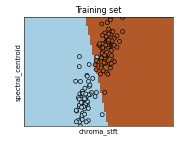

<ipython-input-10-9ab5fe872a15>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


<IPython.core.display.Javascript object>


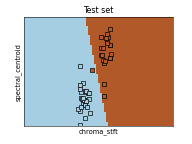

<ipython-input-10-9ab5fe872a15>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


In [10]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

learn_1=logreg.fit(X_reduced_1tr,Y_training_logist)
Y_pred_1tr=learn_1.predict(X_reduced_1tr)
Y_pred_1test=learn_1.predict(X_reduced_1test) #this to save the correct logreg function(theone with the couple of features I decided to select)

h = .02  # step size in the mesh
x_min, x_max =X_reduced_1[:, 0].min() - .5, X_reduced_1[:, 0].max() + .5
y_min, y_max =X_reduced_1[:, 1].min() - .5, X_reduced_1[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = learn_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_reduced_1tr[:, 0], X_reduced_1tr[:, 1], c=Y_training_logist, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("chroma_stft")
plt.ylabel("spectral_centroid")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(2, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_reduced_1test[:, 0], X_reduced_1test[:, 1], c=Y_test_logist, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel("chroma_stft")
plt.ylabel("spectral_centroid")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [4]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [5]:

num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)

print ("Cardinality of Training Set: ", m_t)


np.random.shuffle(Data)


X_training =Data[:round(0.7*num_total_samples),0:13]
Y_training =Data[:round(0.7*num_total_samples),13]
print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

X_test =Data[round(0.7*num_total_samples):,0:13]
Y_test =Data[round(0.7*num_total_samples):,13]
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Cardinality of Training Set:  350
Training input data size:  (350, 13)
Training output data size:  (350,)
Test input data size:  (150, 13)
Test output data size:  (150,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [6]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [ 0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0.  0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [ 0.04986249  0.072656    0.01792765 -0.0544767   0.08737773 -0.18101341
  0.00017336  0.02847916  0.09248042  0.0958913   0.06257113  0.02501187
  0.04114918]
Std of the test input data: [0.9069133  1.10175099 1.00449171 0.90562503 1.12002667 0.91212002
 1.02666983 1.03688144 1.06987191 1.02717589 1.01829169 0.91831261
 0.94065393]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [8]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr = np.linalg.lstsq(X_trainingH, Y_training, rcond=None)
print("LS coefficients with numpy lstsq:", w_np)

# compute Residual sums of squares 

print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

LS coefficients with numpy lstsq: [228.11714286  -7.76575437  11.0156735    1.15055157   6.88006092
 -13.84484245  29.21880301  -2.15872628 -29.01844508  20.87803821
 -19.30873    -17.38350192  11.08591981 -35.9943026 ]
RSS with numpy lstsq:  [733132.69300182]
Empirical risk with numpy lstsq: [2094.66483715]


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [9]:
#compute predictions on training and test

prediction_training = np.inner(X_trainingH,w_np)
prediction_test = np.inner(X_testH,w_np)

RSS_training=np.inner((Y_training-prediction_training),(Y_training-prediction_training))
RSS_test=np.inner((Y_test-prediction_test),(Y_test-prediction_test))

print(RSS_training,"\n",RSS_training/m_training)
print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

733132.693001817 
 2094.6648371480487
RSS on test data: 366685.4303782723
Loss estimated from test data: 2444.569535855149


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

Insert your answer here

The error on the test data is higher but still comparable with the training one


## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [17]:
from sklearn import linear_model

LinReg = sl.linear_model.LinearRegression()
learnhuse=LinReg.fit(X_training,Y_training)

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

#diabetes_y_pred = regr.predict(diabetes_X_test)
#np.inner(LinReg.coef_,X_test)

prediction_training = learnhuse.predict(X_training)
prediction_test = learnhuse.predict(X_test)


RSS_test=np.inner((Y_test-prediction_test),(Y_test-prediction_test))
RSS_training=np.inner((Y_training-prediction_training),(Y_training-prediction_training))

print("RSS on training data:",  RSS_training)
print("Loss estimated from training data:", RSS_training/m_training)
print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

print("Measure on training data:", 1-LinReg.score(X_training, Y_training))

Intercept: 228.11714285714305
Least-Squares Coefficients: [ -7.76575437  11.0156735    1.15055157   6.88006092 -13.84484245
  29.21880301  -2.15872628 -29.01844508  20.87803821 -19.30873
 -17.38350192  11.08591981 -35.9943026 ]
RSS on training data: 733132.693001817
Loss estimated from training data: 2094.6648371480487
RSS on test data: 366685.43037827255
Loss estimated from test data: 2444.56953585515
Measure on training data: 0.2510179774129542
